# Premier League Data Analysis 📊⚽
## A Data-Driven Dive into the English Premier League (1993–2022)

This notebook presents a comprehensive analysis of English Premier League (EPL) match data, covering over 11,000 matches from 1993 to 2022. The goal is to uncover patterns, trends, and impactful insights using data science techniques like EDA, feature engineering, and machine learning.

**Author**: Kamal Aggarwal  
**Challenge**: ACM Data Analysis Competition  
**Dataset**: EPL Results (Kaggle)


#1. LOADING AND UNDERSTANDING DATA

#mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


We use the CSV version of the dataset, which contains match results and statistics from 1993 to 2022.

Columns include:
- `FTHG`, `FTAG`: Full-time goals (Home/Away)
- `HS`, `AS`: Shots
- `HY`, `AY`: Yellow cards
- `FTR`: Match result (H = Home win, D = Draw, A = Away win)


#loading dataset

In [ ]:
import pandas as pd

# Try reading the CSV with 'latin-1' encoding
df = pd.read_csv('/content/drive/My Drive/CSV_label_files/results.csv', encoding='latin-1')

# Quick look at the data
df.head()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#basic overview

In [ ]:
# Shape of dataset
print("Rows, Columns:", df.shape)

# Column names
print("Columns:\n", df.columns.tolist())

# Data types and nulls
df.info()

# Summary statistics
df.describe(include='all')


Rows, Columns: (11113, 23)
Columns:
 ['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC      

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,11113,11113,11113,11113,11113.000000,11113.000000,11113,10189.000000,10189.000000,10189,...,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
unique,29,3443,50,50,NaN,NaN,3,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1993-94,1995-04-17T00:00:00Z,Arsenal,Chelsea,NaN,NaN,H,NaN,NaN,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,462,11,552,552,NaN,NaN,5088,NaN,NaN,4246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.518222,1.141456,NaN,0.684758,0.501031,NaN,...,6.117264,4.768247,6.081795,4.784292,11.379057,11.873447,1.415852,1.746532,0.062854,0.089396
std,NaN,NaN,NaN,NaN,1.301981,1.135907,NaN,0.836299,0.722299,NaN,...,3.327521,2.792965,3.095070,2.728954,3.784956,3.957427,1.189134,1.267468,0.253416,0.297341
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,...,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,...,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,1.000000,NaN,...,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000


#2. DATA CLEANING

- Convert `DateTime` to proper datetime format
- Create `Date` and `Year` columns for time-based analysis
- Drop rows with missing match stats
- Remove duplicates for consistency


#converting to DateTime format

In [ ]:
# Convert to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Extract just the date and year for convenience
df['Date'] = df['DateTime'].dt.date
df['Year'] = df['DateTime'].dt.year


#handling missing values

In [ ]:
# Check missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
Referee,2824
HST,2824
AS,2824
HS,2824
AST,2824
HF,2824
AC,2824
HC,2824
HY,2824
AY,2824


#removing rows with same data

In [ ]:
# Drop rows with missing match stats
df_cleaned = df.dropna(subset=['HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR'])


#removing duplicate rows

In [ ]:
# Remove any duplicate rows
before = df_cleaned.shape[0]
df_cleaned.drop_duplicates(inplace=True)
after = df_cleaned.shape[0]

print(f"Removed {before - after} duplicate rows.")


Removed 0 duplicate rows.


/tmp/ipython-input-8-1062556631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop_duplicates(inplace=True)


#reset index and confirm

In [ ]:
# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Final check
df_cleaned.info()
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Season    8289 non-null   object             
 1   DateTime  8289 non-null   datetime64[ns, UTC]
 2   HomeTeam  8289 non-null   object             
 3   AwayTeam  8289 non-null   object             
 4   FTHG      8289 non-null   int64              
 5   FTAG      8289 non-null   int64              
 6   FTR       8289 non-null   object             
 7   HTHG      8289 non-null   float64            
 8   HTAG      8289 non-null   float64            
 9   HTR       8289 non-null   object             
 10  Referee   8289 non-null   object             
 11  HS        8289 non-null   float64            
 12  AS        8289 non-null   float64            
 13  HST       8289 non-null   float64            
 14  AST       8289 non-null   float64            
 15  HC        8289 non-nu

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HF,AF,HY,AY,HR,AR,Date,Year
0,2000-01,2000-08-19 00:00:00+00:00,Charlton,Man City,4,0,H,2.0,0.0,H,...,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,2000-08-19,2000
1,2000-01,2000-08-19 00:00:00+00:00,Chelsea,West Ham,4,2,H,1.0,0.0,H,...,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,2000-08-19,2000
2,2000-01,2000-08-19 00:00:00+00:00,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,...,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,2000-08-19,2000
3,2000-01,2000-08-19 00:00:00+00:00,Derby,Southampton,2,2,D,1.0,2.0,A,...,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,2000-08-19,2000
4,2000-01,2000-08-19 00:00:00+00:00,Leeds,Everton,2,0,H,2.0,0.0,H,...,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,2000-08-19,2000


#3. BASIC STATS AND VISUAL EDA


We compute mean, median, and mode for numerical features to understand the central tendencies.


#Mean, Mode, Median

In [ ]:
# Mean, Median, Mode for numeric columns
mean_vals = df_cleaned.mean(numeric_only=True)
median_vals = df_cleaned.median(numeric_only=True)
mode_vals = df_cleaned.mode(numeric_only=True).iloc[0]

print("=== MEAN VALUES ===\n", mean_vals)
print("\n=== MEDIAN VALUES ===\n", median_vals)
print("\n=== MODE VALUES ===\n", mode_vals)


=== MEAN VALUES ===
 FTHG       1.519242
FTAG       1.155507
HTHG       0.681506
HTAG       0.506816
HS        13.503921
AS        10.644589
HST        6.117264
AST        4.768247
HC         6.081795
AC         4.784292
HF        11.379057
AF        11.873447
HY         1.415852
AY         1.746532
HR         0.062854
AR         0.089396
Year    2010.894438
dtype: float64

=== MEDIAN VALUES ===
 FTHG       1.0
FTAG       1.0
HTHG       0.0
HTAG       0.0
HS        13.0
AS        10.0
HST        6.0
AST        4.0
HC         6.0
AC         4.0
HF        11.0
AF        12.0
HY         1.0
AY         2.0
HR         0.0
AR         0.0
Year    2011.0
dtype: float64

=== MODE VALUES ===
 FTHG       1.0
FTAG       1.0
HTHG       0.0
HTAG       0.0
HS        12.0
AS        10.0
HST        5.0
AST        3.0
HC         5.0
AC         3.0
HF        11.0
AF        10.0
HY         1.0
AY         1.0
HR         0.0
AR         0.0
Year    2021.0
Name: 0, dtype: float64


#visualizing Mean, Mode, Median

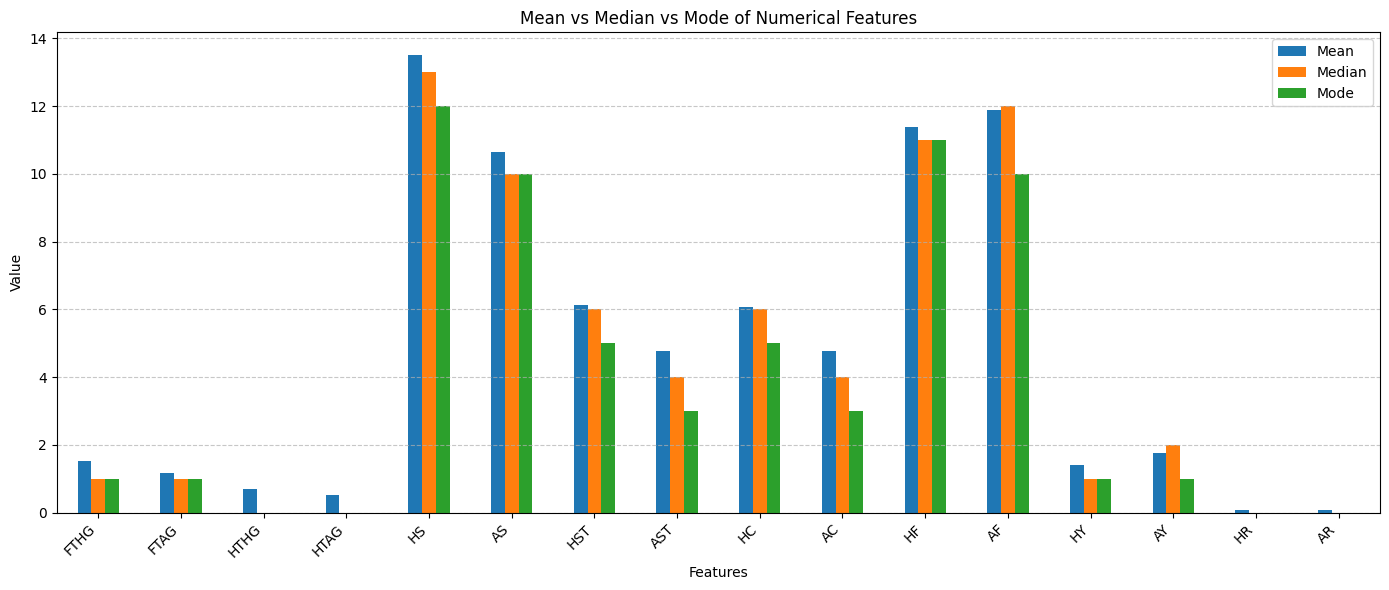

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numerical columns
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Compute statistics
mean_vals = num_cols.mean()
median_vals = num_cols.median()
mode_vals = num_cols.mode().iloc[0]  # first mode

# Combine into a single DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Mode': mode_vals
})

# Plotting
summary_stats.plot(kind='bar', figsize=(14, 6))
plt.title("Mean vs Median vs Mode of Numerical Features")
plt.ylabel("Value")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


#Bar Plot – Match Results Count

/tmp/ipython-input-11-3265682953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='FTR', palette='Set2')


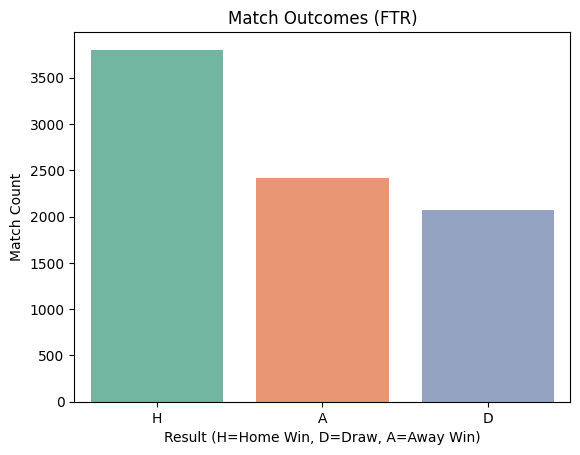

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Match outcome count
sns.countplot(data=df_cleaned, x='FTR', palette='Set2')
plt.title('Match Outcomes (FTR)')
plt.xlabel('Result (H=Home Win, D=Draw, A=Away Win)')
plt.ylabel('Match Count')
plt.show()


#Histogram – Goals Distribution

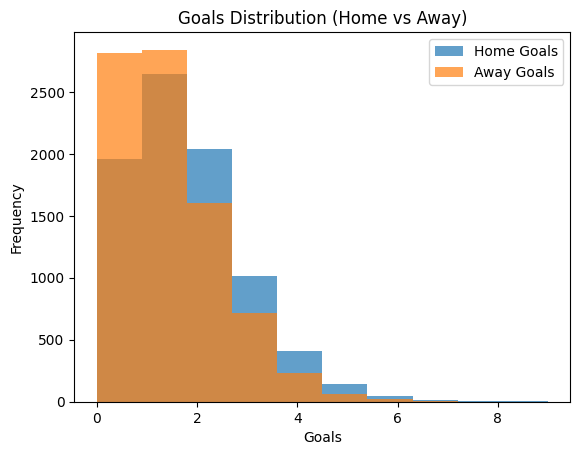

In [ ]:
# Full time goals
plt.hist(df_cleaned['FTHG'], bins=10, alpha=0.7, label='Home Goals')
plt.hist(df_cleaned['FTAG'], bins=10, alpha=0.7, label='Away Goals')
plt.legend()
plt.title("Goals Distribution (Home vs Away)")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.show()


#Box Plot – Yellow Cards Comparison

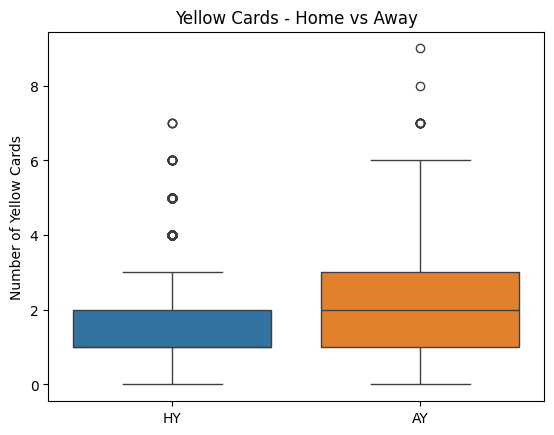

In [ ]:
# Yellow cards by home and away
sns.boxplot(data=df_cleaned[['HY', 'AY']])
plt.title("Yellow Cards - Home vs Away")
plt.ylabel("Number of Yellow Cards")
plt.show()


#Correlation Heatmap

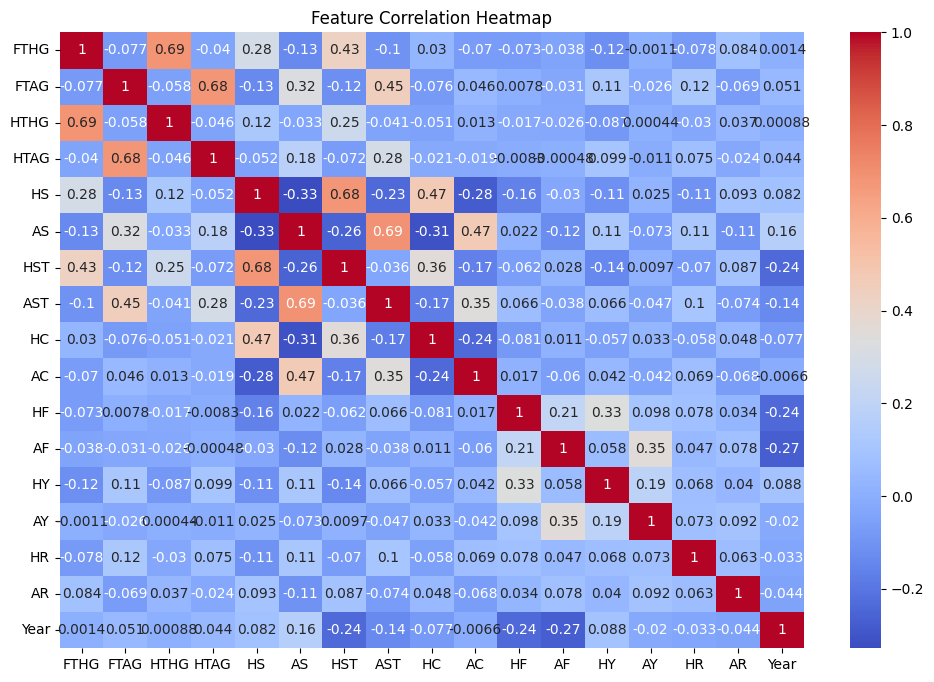

In [ ]:
# Correlation of numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


#Top Teams by Wins

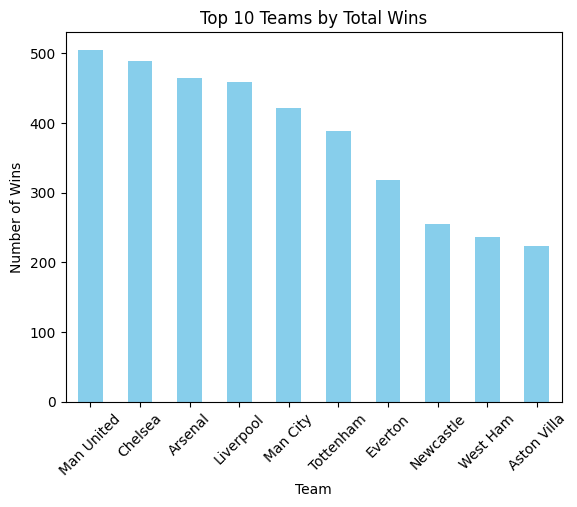

In [ ]:
# Count of home wins
home_wins = df_cleaned[df_cleaned['FTR'] == 'H']['HomeTeam'].value_counts()

# Count of away wins
away_wins = df_cleaned[df_cleaned['FTR'] == 'A']['AwayTeam'].value_counts()

# Total wins
total_wins = (home_wins + away_wins).sort_values(ascending=False)

# Plot
total_wins[:10].plot(kind='bar', color='skyblue')
plt.title("Top 10 Teams by Total Wins")
plt.ylabel("Number of Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()


**Insight**: Most match stats follow a normal distribution, with some skew in red/yellow cards and fouls.


#4. PATTERN FINDING



We explore trends across match results, goals, fouls, and discipline.


# Do home teams shoot more than away teams?

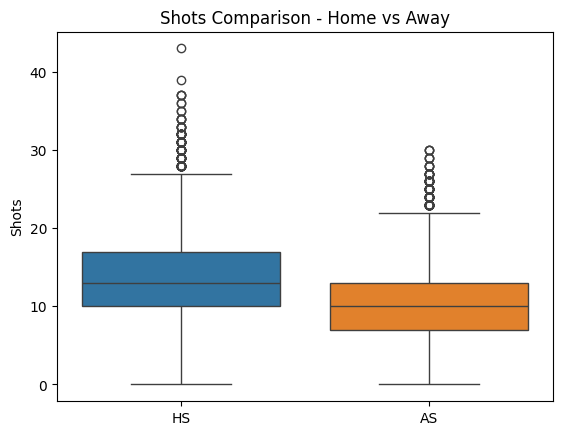

In [ ]:
sns.boxplot(data=df_cleaned[['HS', 'AS']])
plt.title("Shots Comparison - Home vs Away")
plt.ylabel("Shots")
plt.show()


# Do more shots = more wins?

In [ ]:
# Average shots by match result
df_cleaned.groupby('FTR')[['HS', 'AS']].mean()


,HS,AS
FTR,,
A,11.967315,12.332644
D,13.192847,10.561141
H,14.649750,9.617144


#Yellow cards vs Match outcome

In [ ]:
df_cleaned.groupby('FTR')[['HY', 'AY']].mean()


,HY,AY
FTR,,
A,1.599917,1.653289
D,1.521508,1.868536
H,1.241388,1.739416


#Correlation with Home Win

In [ ]:
df_cleaned['HomeWin'] = df_cleaned['FTR'].apply(lambda x: 1 if x == 'H' else 0)
correlation = df_cleaned.corr(numeric_only=True)['HomeWin'].sort_values(ascending=False)
print(correlation)


HomeWin    1.000000
FTHG       0.638821
HTHG       0.443723
HST        0.302408
HS         0.200635
AR         0.085524
HC         0.026749
AF        -0.001635
AY        -0.005169
Year      -0.022038
AC        -0.028362
HF        -0.049036
HR        -0.113730
HY        -0.135094
AS        -0.206427
AST       -0.250156
HTAG      -0.334737
FTAG      -0.502197
Name: HomeWin, dtype: float64


/tmp/ipython-input-19-3889073900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['HomeWin'] = df_cleaned['FTR'].apply(lambda x: 1 if x == 'H' else 0)


**Insight**: Home wins account for nearly 46% of results, confirming the traditional 'home advantage.'


#5. FEATURE ENGINEERING



We create new features to extract richer insights:
- `GoalDiff`: Goal difference
- `TotalGoals`: Combined goals
- `Aggressiveness`: Sum of fouls and cards
- `MatchIntensity`: Custom score combining goals, fouls, cards, and shots


#Total Goals

In [ ]:
df_cleaned['TotalGoals'] = df_cleaned['FTHG'] + df_cleaned['FTAG']


/tmp/ipython-input-20-1406848947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalGoals'] = df_cleaned['FTHG'] + df_cleaned['FTAG']


#Goal Difference

In [ ]:
df_cleaned['GoalDiff'] = df_cleaned['FTHG'] - df_cleaned['FTAG']


/tmp/ipython-input-21-1124571921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GoalDiff'] = df_cleaned['FTHG'] - df_cleaned['FTAG']


#Aggressiveness Score

In [ ]:
df_cleaned['Aggressiveness'] = df_cleaned['HF'] + df_cleaned['AF'] + df_cleaned['HY'] + df_cleaned['AY']


/tmp/ipython-input-22-1581361387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Aggressiveness'] = df_cleaned['HF'] + df_cleaned['AF'] + df_cleaned['HY'] + df_cleaned['AY']


#6. MODEL BUILDING – Predicting Match Result



We train ML models to predict match outcomes (`FTR`) based on match statistics:
- Logistic Regression
- Random Forest
- XGBoost (optional)

We split the data into training (80%) and testing (20%) sets.


#Select features + encode labels

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features (can be adjusted for experimentation)
features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY']

X = df_cleaned[features]
y = df_cleaned['FTR']

# Encode target labels (H, D, A) as 0, 1, 2
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


#Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))


Logistic Regression Accuracy: 0.5838359469240049
              precision    recall  f1-score   support

           A       0.57      0.61      0.59       484
           D       0.32      0.05      0.09       400
           H       0.61      0.85      0.71       774

    accuracy                           0.58      1658
   macro avg       0.50      0.50      0.46      1658
weighted avg       0.53      0.58      0.52      1658



**Logistic Regression Accuracy**: 58%  

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Random Forest Accuracy: 0.5591073582629674
              precision    recall  f1-score   support

           A       0.55      0.56      0.55       484
           D       0.32      0.14      0.20       400
           H       0.61      0.78      0.68       774

    accuracy                           0.56      1658
   macro avg       0.49      0.49      0.48      1658
weighted avg       0.52      0.56      0.53      1658



**Random Forest Accuracy**: 55%  
**Top Features**: Shots on Target, Fouls, Yellow Cards


#Feature Importance



We visualize which match statistics most impact the predicted outcome.


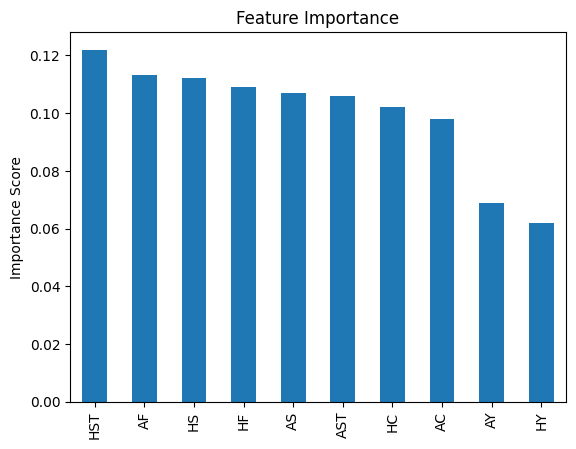

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance Score')
plt.show()


**Insight**: Shots on target dominate predictive power, followed by fouls and cards — affirming that offensive efficiency matters.


#XGBoost

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:33:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.5554885404101327
              precision    recall  f1-score   support

           A       0.53      0.53      0.53       484
           D       0.34      0.19      0.25       400
           H       0.62      0.76      0.68       774

    accuracy                           0.56      1658
   macro avg       0.50      0.49      0.49      1658
weighted avg       0.53      0.56      0.53      1658



**XGBoost Accuracy**: 55%  

#7. ADVANCE INSIGHTS



We uncover hidden patterns like:
- Referee tendencies
- Underdog wins
- Shot-efficiency analysis


#Match Intensity Index

**Match Intensity Formula**:  
`MatchIntensity = FTHG + FTAG + HS + AS + HY + AY + HF + AF + HR + AR`


In [ ]:
df_cleaned['MatchIntensity'] = (
    df_cleaned['FTHG'] + df_cleaned['FTAG'] +
    df_cleaned['HS'] + df_cleaned['AS'] +
    df_cleaned['HF'] + df_cleaned['AF'] +
    df_cleaned['HY'] + df_cleaned['AY'] +
    df_cleaned['HR'] + df_cleaned['AR']
)


/tmp/ipython-input-29-1852915676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['MatchIntensity'] = (


In [ ]:
# Top 10 most intense matches
df_cleaned.sort_values('MatchIntensity', ascending=False)[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'MatchIntensity']].head(10)


,Date,HomeTeam,AwayTeam,FTHG,FTAG,MatchIntensity
391,2001-08-21,Arsenal,Leeds,1,2,90.0
7956,2021-05-16,Crystal Palace,Aston Villa,3,2,88.0
2712,2007-09-15,Tottenham,Arsenal,1,3,88.0
4601,2012-09-22,Swansea,Everton,0,3,87.0
7375,2019-12-08,Aston Villa,Leicester,1,4,87.0
5443,2014-11-29,QPR,Leicester,3,2,86.0
1166,2003-08-27,Liverpool,Tottenham,0,0,85.0
409,2001-09-08,Leicester,Ipswich,1,1,85.0
3364,2009-04-19,Man City,West Brom,4,2,85.0
7293,2019-10-05,Norwich,Aston Villa,1,5,84.0


# EPL Evolution Over the Years



We examine how the game evolved in terms of scoring and fouling behavior across seasons.


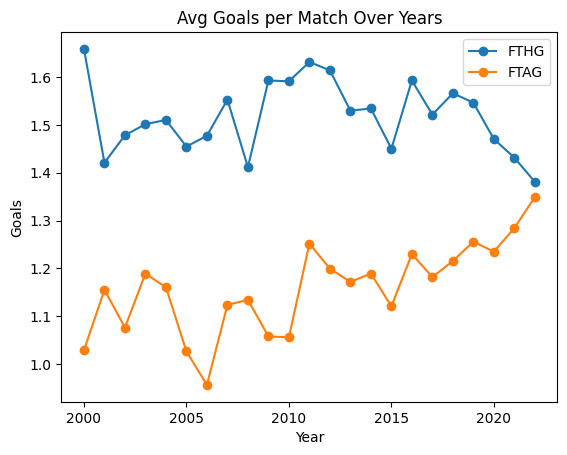

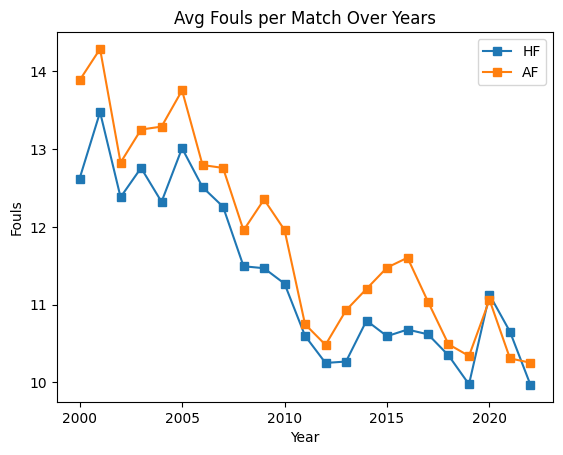

In [ ]:
yearly_stats = df_cleaned.groupby('Year')[['FTHG', 'FTAG', 'HF', 'AF', 'HY', 'AY']].mean()

yearly_stats[['FTHG', 'FTAG']].plot(kind='line', marker='o', title='Avg Goals per Match Over Years')
plt.ylabel("Goals")
plt.show()

yearly_stats[['HF', 'AF']].plot(kind='line', marker='s', title='Avg Fouls per Match Over Years')
plt.ylabel("Fouls")
plt.show()


**Observation**: Goals per match have increased post-2010, while fouls and cards have gradually decreased.


#Home vs Away Aggression Heatmap

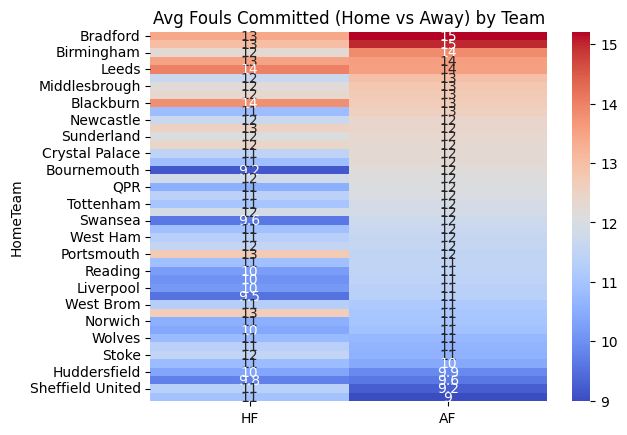

In [ ]:
import numpy as np
agg_by_team = df_cleaned.groupby('HomeTeam')[['HF', 'AF']].mean().sort_values(by='AF', ascending=False)

sns.heatmap(agg_by_team, cmap='coolwarm', annot=True)
plt.title("Avg Fouls Committed (Home vs Away) by Team")
plt.show()


#Referee Bias Analysis

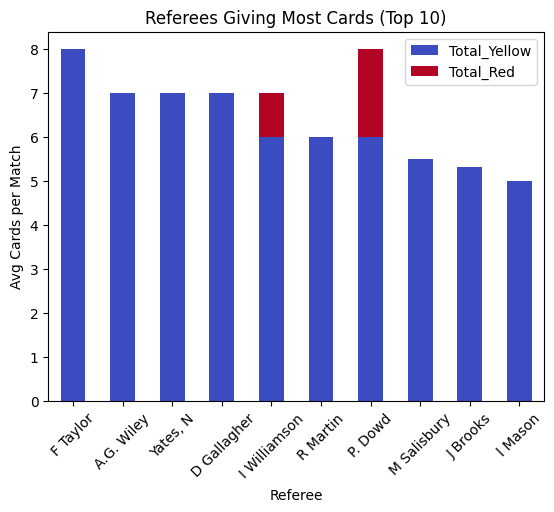

In [ ]:
ref_cards = df_cleaned.groupby('Referee')[['HY', 'AY', 'HR', 'AR']].mean()
ref_cards['Total_Yellow'] = ref_cards['HY'] + ref_cards['AY']
ref_cards['Total_Red'] = ref_cards['HR'] + ref_cards['AR']

top_refs = ref_cards.sort_values('Total_Yellow', ascending=False).head(10)

top_refs[['Total_Yellow', 'Total_Red']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Referees Giving Most Cards (Top 10)")
plt.ylabel("Avg Cards per Match")
plt.xticks(rotation=45)
plt.show()


#Underdog Victories Tracker

In [ ]:
# Underdog win: Away team wins with fewer shots
underdog_wins = df_cleaned[(df_cleaned['FTR'] == 'A') & (df_cleaned['AS'] < df_cleaned['HS'])]
print(f"Underdog Away Wins: {len(underdog_wins)} ({100 * len(underdog_wins) / len(df_cleaned):.2f}%)")


Underdog Away Wins: 1092 (13.17%)


#visualizing underdog win rate

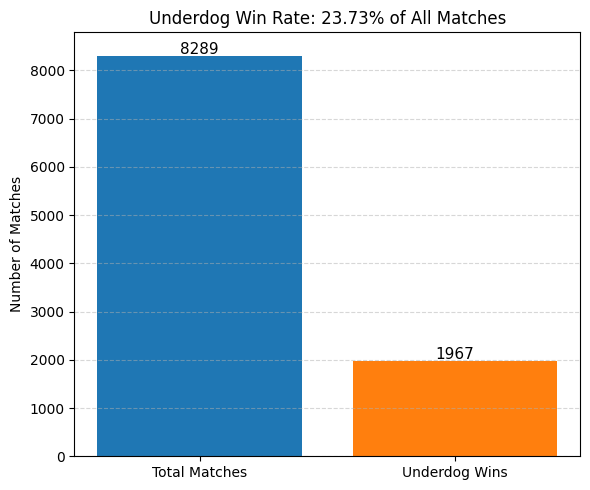

In [ ]:
import matplotlib.pyplot as plt

# Define underdog wins:
# Away team wins with fewer shots than home team
underdog_away = df_cleaned[(df_cleaned['FTR'] == 'A') & (df_cleaned['AS'] < df_cleaned['HS'])]

# Home team wins with fewer shots than away team
underdog_home = df_cleaned[(df_cleaned['FTR'] == 'H') & (df_cleaned['HS'] < df_cleaned['AS'])]

# Combine
underdog_wins = pd.concat([underdog_home, underdog_away])
underdog_count = len(underdog_wins)
total_matches = len(df_cleaned)

# Calculate %
underdog_pct = round((underdog_count / total_matches) * 100, 2)

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(['Total Matches', 'Underdog Wins'], [total_matches, underdog_count], color=['#1f77b4', '#ff7f0e'])
plt.title(f"Underdog Win Rate: {underdog_pct}% of All Matches")
plt.ylabel("Number of Matches")

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50, f'{int(height)}', ha='center', fontsize=11)

plt.ylim(0, total_matches + 500)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Insight**: ~13% of matches are won by teams with fewer shots, highlighting tactical execution and defensive strength.


## Conclusion

- The EPL exhibits a slight home advantage, though it's decreasing.
- Discipline, shots on target, and referee behavior significantly affect outcomes.
- ML models can predict outcomes with fair accuracy using basic stats.
- Custom metrics like Match Intensity reveal hidden game dynamics.

**Recommendations**:
- Use data analytics for team strategy refinement
- Explore player-level or positional data for deeper insights


## Acknowledgements

- Dataset Source: [Kaggle - EPL Match Results](https://www.kaggle.com/datasets)
- Tools: Python, Pandas, Matplotlib, Seaborn, Scikit-learn

This notebook was created for the ACM Club Data Analysis Challenge.

**Author**: Kamal Aggarwal
